# Module 1 Homework

## Q1. Downloading the data

In [1]:
!ls -l dataset

total 93192
-rwxrwxrwx 1 balasubramanian balasubramanian 47673370 Mar 21  2023 yellow_tripdata_2023-01.parquet
-rwxrwxrwx 1 balasubramanian balasubramanian 47748012 May  1  2023 yellow_tripdata_2023-02.parquet


In [2]:
import pandas as pd

In [3]:
nyc_tripdata_yellow_jan_24_df = pd.read_parquet("./dataset/yellow_tripdata_2023-01.parquet")

In [4]:
nyc_tripdata_yellow_jan_24_df.shape

(3066766, 19)

In [5]:
nyc_tripdata_yellow_jan_24_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


## Q2. Computing duration

In [6]:
nyc_tripdata_yellow_jan_24_df["duration"] = nyc_tripdata_yellow_jan_24_df.apply(
    lambda td: (td["tpep_dropoff_datetime"] - td["tpep_pickup_datetime"]).total_seconds() / 60, 
    axis=1
)

In [7]:
nyc_tripdata_yellow_jan_24_df["duration"].std()

42.59435124195458

## Q3. Dropping outliers

In [8]:
import seaborn as sns

In [9]:
nyc_tripdata_yellow_jan_24_df["duration"].describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

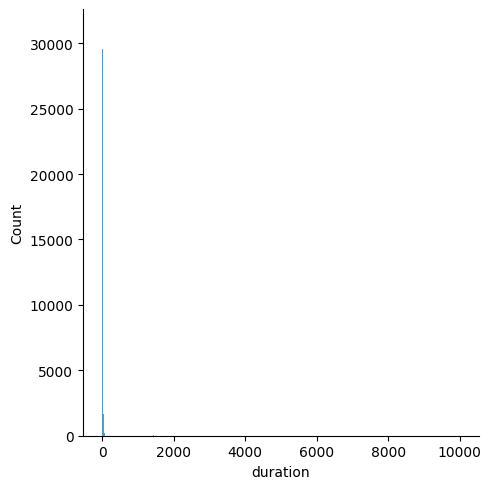

In [10]:
sns.displot(nyc_tripdata_yellow_jan_24_df["duration"])

In [11]:
nyc_j24_trimmed_df = nyc_tripdata_yellow_jan_24_df.query('duration >= 1 and duration <= 60').copy()

In [12]:
nyc_j24_trimmed_df.shape

(3009173, 20)

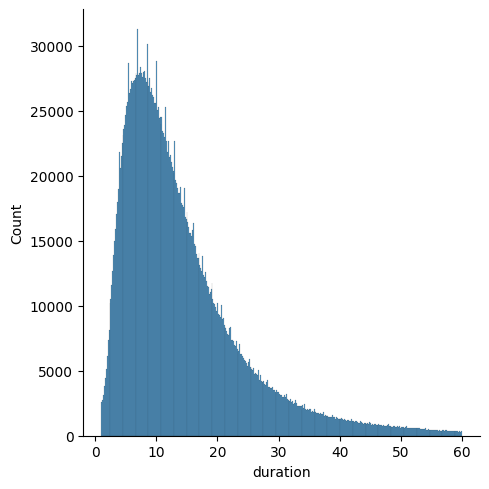

In [13]:
sns.displot(nyc_j24_trimmed_df["duration"])

In [14]:
(nyc_j24_trimmed_df.shape[0] / nyc_tripdata_yellow_jan_24_df.shape[0]) * 100

98.1220282212598

## Q4. One-hot encoding

In [15]:
features = ["PULocationID", "DOLocationID"]

In [16]:
nyc_j24_trimmed_df[features] = nyc_j24_trimmed_df[features].astype(str)

In [17]:
feature_dict = nyc_j24_trimmed_df[features].to_dict(orient="records")

In [18]:
from sklearn.feature_extraction import DictVectorizer

In [19]:
dv = DictVectorizer()

In [20]:
%%time

X_train = dv.fit_transform(feature_dict)

CPU times: user 3.82 s, sys: 150 ms, total: 3.97 s
Wall time: 3.98 s


In [21]:
X_train.shape

(3009173, 515)

## Q5. Training a model

In [24]:
target = 'duration'

In [26]:
y_train = nyc_j24_trimmed_df[target].values

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(X_train)

In [31]:
from sklearn.metrics import root_mean_squared_error

In [33]:
root_mean_squared_error(y_train, y_pred)

7.649261934850555

## Q6. Evaluating the model

In [34]:
del nyc_tripdata_yellow_jan_24_df
del nyc_j24_trimmed_df
del feature_dict

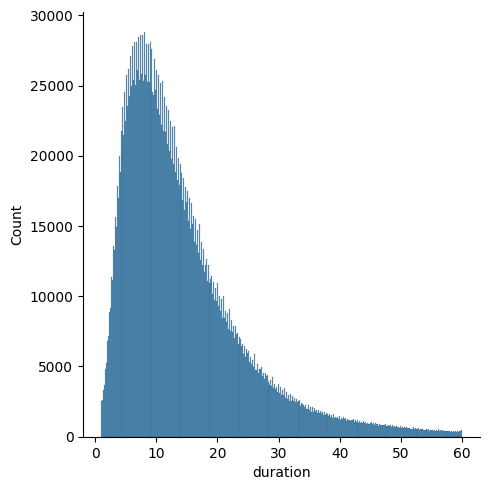

In [35]:
nyc_tripdata_yellow_feb_24_df = pd.read_parquet("./dataset/yellow_tripdata_2023-02.parquet")
nyc_tripdata_yellow_feb_24_df["duration"] = nyc_tripdata_yellow_feb_24_df.apply(
    lambda td: (td["tpep_dropoff_datetime"] - td["tpep_pickup_datetime"]).total_seconds() / 60, 
    axis=1
)
nyc_f24_trimmed_df = nyc_tripdata_yellow_feb_24_df.query('duration >= 1 and duration <= 60').copy()

sns.displot(nyc_f24_trimmed_df["duration"])

In [36]:
nyc_f24_trimmed_df[features] = nyc_f24_trimmed_df[features].astype(str)
eX_train = dv.transform(nyc_f24_trimmed_df[features].to_dict(orient="records"))

In [37]:
ey_train = nyc_f24_trimmed_df[target].values

In [38]:
ey_pred = lr.predict(eX_train)

In [39]:
root_mean_squared_error(ey_train, ey_pred)

7.811817745843695

In [40]:
import matplotlib.pyplot as plt

/tmp/ipykernel_31187/2755003232.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ey_pred, label='Prediction')
/tmp/ipykernel_31187/2755003232.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ey_train, label='Actual')


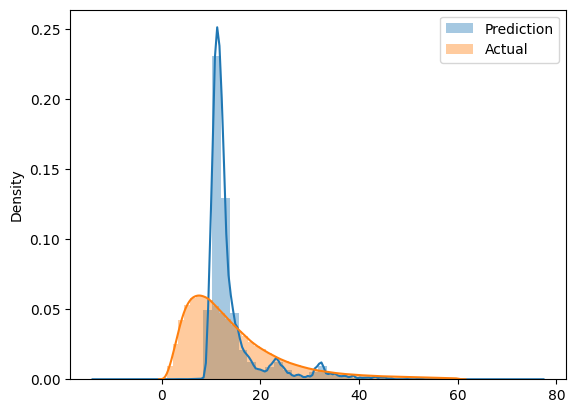

In [41]:
sns.distplot(ey_pred, label='Prediction')
sns.distplot(ey_train, label='Actual')

plt.legend()